# Test allocation based on risk of infection from first and second order contact tracing

### Set the parameters on the Open ABM model

In [1]:
n_total = 50000 #number of individuals 
initial_inf = 10 #number of patients zero
T = 30 #number of days
seed_open_ABM = 1 # seed for the Open ABM 
quarantined_random_interactions = 0 #type of quarantine (1: work, 0: work and random)

### Set the parameters on the intervention method

In [2]:
t_0 = 12  #time to start the intervention method
test_availables = 125 #number of daily tests
quarantine_household =  False #to quarantine individuals in the same household 
test_household = False #to test individuals in the same hoisehold
p_SS = 1 #proportion of individuals with severe symptomps detected by day
p_SM = 0.75 #proportion of individuals with mild symptomps detected by day
seed = 2 #seed for the ranking method (starts at 2 because seed = 1 is fixed for the random tests) 
days_of_quarantine = 100 #days of quarantine
output_dir = "./simulation_results/"
time_infection = 'estimation' #type of estimation for the time of infection ('estimation': tau, 'constant': alpha, True: real time of infection)

### Set the parameters on the contact tracing method

In [3]:
prob_function = 'lambda'
gamma = 6
delta = gamma + 3

### Ranking methods

In [4]:
from intervention_strategies.intervention_model import *
from intervention_strategies.First_Degree_Contact_Tracing_Risk import *
from intervention_strategies.Second_Degree_Contact_Tracing_Risk import *
from intervention_strategies.Contact_Tracing import *
from intervention_strategies.Random_Selection import *

In [5]:
timeseries_sim_2_CT = run_intervention_model(ranked_method = Second_Degree_Contact_Tracing_Risk(gamma = gamma, delta = delta, prob_function = prob_function), 
                           test_availables = test_availables, seed = seed, p_SM = p_SM, time_infection = time_infection, t_end = T)

timeseries_sim_1_CT = run_intervention_model(ranked_method = First_Degree_Contact_Tracing_Risk(gamma = gamma, prob_function = prob_function),  
                           test_availables = test_availables, seed = seed, p_SM = p_SM, time_infection = time_infection, t_end = T)

timeseries_sim_CT = run_intervention_model(ranked_method = Contact_Tracing(gamma = gamma), 
                           test_availables = test_availables, seed = seed, p_SM = p_SM, time_infection = time_infection, t_end = T)

timeseries_sim_RS = run_intervention_model(ranked_method = Random_Selection(), 
                           test_availables = test_availables, seed = seed, p_SM = p_SM, time_infection = time_infection, t_end = T)

CT method for seed 2
CT method for seed 2
CT method for seed 2
CT method for seed 2


### Plot 

In [6]:
import matplotlib.pyplot as plt

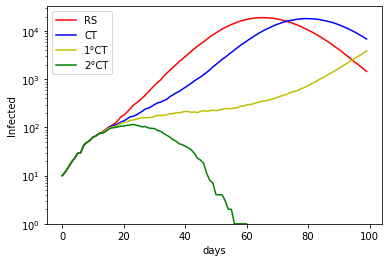

In [7]:
fig, ax = plt.subplots()

ax.plot(timeseries_sim_RS["time"],timeseries_sim_RS["active"], 'r', label = 'RS')
ax.plot(timeseries_sim_CT["time"],timeseries_sim_CT["active"], 'b', label = 'CT')
ax.plot(timeseries_sim_1_CT["time"],timeseries_sim_1_CT["active"], 'y', label = '1°CT')
ax.plot(timeseries_sim_2_CT["time"],timeseries_sim_2_CT["active"], 'g', label = '2°CT')

leg = ax.legend();

plt.semilogy()
plt.ylim([1,2**15])
plt.ylabel("Infected")
plt.xlabel("days")
plt.legend()
plt.show()